# Aula 03
* pacote os
* datetime
* pacote scipy

## README
Crie uma pasta no diretório 2024. Alternativamente, você pode criar uma pasta no mesmo diretório deste jupyter notebook com nome de dados


# Utilizando o pacote OS
Baixando os dados de https://hoinaski.prof.ufsc.br/BRAIN/


In [127]:
#Importando pacote os
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import windrose


# Extraindo o diretório que estamos trabalhando
cwd = os.getcwd()
print('Diretorio atual '+cwd)
#Estabelecendo a pasta de dados que quero utilizar
dataPath=os.path.dirname(cwd)+'\\dados'
print('Diretório de dados '+dataPath)

In [128]:
# Listar documentos que estão dentro da pasta de dados 
dataList=os.listdir(dataPath)
print(dataList)
dataList[0]

['metar_SBFL_2022.csv', 'metar_SBFL_2023.csv', 'metar_SBFL_2024.csv']


'metar_SBFL_2022.csv'

In [129]:
#Listando arquivos com o nome iniciando em metas
prefixed = [filename for filename in os.listdir(dataPath) if filename.startswith("metar")]
print(prefixed)

['metar_SBFL_2022.csv', 'metar_SBFL_2023.csv', 'metar_SBFL_2024.csv']


In [130]:
#Extraindo os anos dos dados
#Trabalhando com o nome dos arquivos
years=[]
for dl in dataList:
    if os.path.isfile(dataPath+'\\'+dl):
        years.append(dl.split('_')[-1].split('.')[0])
    else:
        print('Não é um arquivo')
years=np.unique(years)
print(years)

#Extraindo as estações de dados
stations = []
for dl in dataList:
    if os.path.isfile(dataPath+'\\'+dl):
        stations.append(dl.split('_')[-2])

stations=np.unique(stations)
print(stations)
    

['2022' '2023' '2024']
['SBFL']


In [131]:
# lendo todos os arquivos da pasta
# Todos os dados devem estar no mesmo formato, com as mesmas colunas
dataAll=[]
for dl in dataList:
    print(dl)
    data = pd.read_csv(dataPath+'\\'+dl)
    dataAll.append(data)

# Concatenando a lista de dados
dataAll = pd.concat(dataAll)
dataAll.head()

metar_SBFL_2022.csv
metar_SBFL_2023.csv
metar_SBFL_2024.csv


,day,month,year,hour,ct,wd,ws,hc,ccp,cco,p,temp,dpTemp,vis,pw,relh
0,1,1,2022,0,NaN,120.0,1.543332,914.4,1.0,1.0,1009.678792,23.0,21.0,NaN,0.0,88.51
1,1,1,2022,1,NaN,280.0,1.028888,NaN,NaN,NaN,1009.685980,20.0,20.0,NaN,0.0,100.00
2,1,1,2022,2,NaN,NaN,0.514444,NaN,NaN,NaN,1009.678792,22.0,21.0,NaN,0.0,94.06
3,1,1,2022,3,NaN,NaN,1.028888,457.2,1.0,1.0,1009.682386,21.0,21.0,NaN,0.0,100.00
4,1,1,2022,4,NaN,NaN,1.028888,NaN,NaN,NaN,1009.685980,22.0,20.0,NaN,0.0,88.43


In [132]:
# Criando uma função para gerar figuras e estastíticas
def statisticsAndFigures (dataAll,st,years,cwd):
    
    from windrose import WindroseAxes
    
    # Criando a pasta das figuras
    os.makedirs(os.path.dirname(cwd) +'\\figuras\\'+st, exist_ok=True)
    
    # Criando uma figura para a estação
    fig, ax = plt.subplots(2)
    ax[0].plot(dataAll.temp,color='red')
    ax[1].plot(dataAll.p, color = '#f3c926')
    fig.suptitle(st)

    # Salvando a figura
    fig.savefig(os.path.dirname(cwd) +'\\figuras\\'+st+'\\timeseries_'+st+'_'+years[0]+'to'+years[-1]+'.png')

    # Criando uma figura para a estação - windrose
    ax = WindroseAxes.from_ax()
    ax.bar(dataAll['wd'], dataAll['ws'], normed=True, opening=0.8, edgecolor="white")
    ax.set_legend()

    # Salvando a figura
    plt.savefig(os.path.dirname(cwd) +'\\figuras\\'+st+'\\windRose_'+st+'_'+years[0]+'to'+years[-1]+'.png')
    
    return fig

SBFL
2022
2023
2024


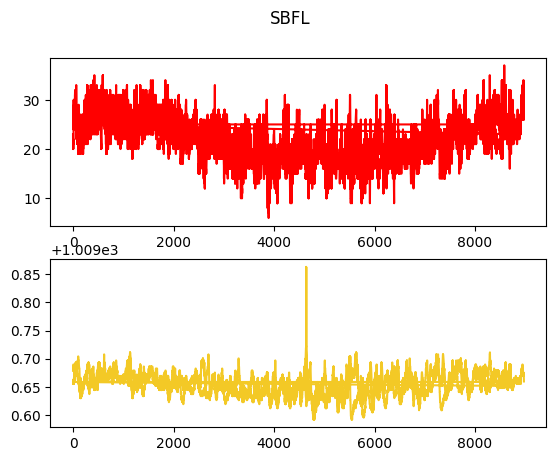

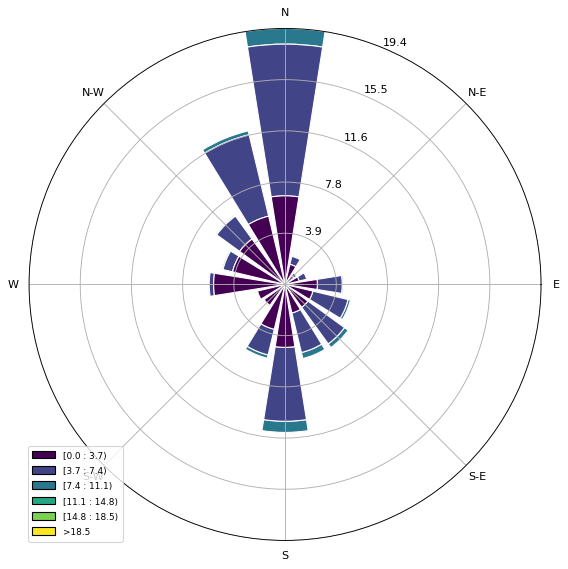

In [133]:
# Condicionando a leitura para apenas uma estação
for st in stations:
    dataAll = []
    print(st)
    for year in years:
        print(year)
        try:
            data = pd.read_csv(dataPath+'\\'+'metar_'+st+'_'+year+'.csv')
            dataAll.append(data)
        except:
            print('Não tem a estação ou o ano')
    
    # Concatenando a lista de dados
    dataAll = pd.concat(dataAll)
    statisticsAndFigures (dataAll,st,years,cwd)
    

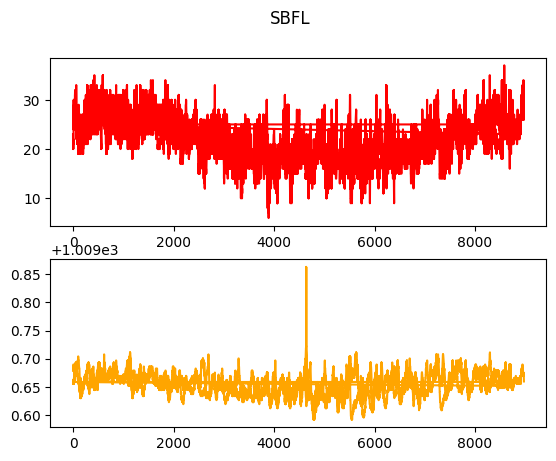

In [134]:
#salvando as figuras em uma pasta

#criando a pasta pora salvar a figura, se não existir
os.makedirs(os.path.dirname(cwd)+'\\figuras\\'+st,exist_ok=True)

#criando uma figura para a estação
fig, ax = plt.subplots(2)
ax[0].plot(dataAll.temp, color='red')
ax[1].plot(dataAll.p, color='orange')
fig.suptitle(st)

#salvando as figuras na pasta
fig.savefig(os.path.dirname(cwd)+'\\figuras\\'+st+'\\timeseries_'+st+'_'+years[0]+'to'+years[-1]+'.png')

## Trabalhando com datas no python

Utilizaremos o pacote datetime e o pandas para trabalhar com datas.
Lembrem que o correto é utilizar datas no formato ano, mês, dia hora, minuto, segundo ou YYYYMMDDHH ou YYYY/MM/DD -hh:mm:ss

In [135]:
#importando pacote datetime
import datetime

In [136]:
date = datetime.datetime(2022,1,1,1,30,30)
print(date.year)
print(date.month)
print(date.day)
print(date.hour)
print(date.minute)
print(date.second)

2022
1
1
1
30
30


In [137]:
#Criando uma coluna datetime no meu dataframe
dataAll['datetime']=pd.to_datetime(dataAll[['year','month','day','hour']])
dataAll.head()

,day,month,year,hour,ct,wd,ws,hc,ccp,cco,p,temp,dpTemp,vis,pw,relh,datetime
0,1,1,2022,0,NaN,120.0,1.543332,914.4,1.0,1.0,1009.678792,23.0,21.0,NaN,0.0,88.51,2022-01-01 00:00:00
1,1,1,2022,1,NaN,280.0,1.028888,NaN,NaN,NaN,1009.685980,20.0,20.0,NaN,0.0,100.00,2022-01-01 01:00:00
2,1,1,2022,2,NaN,NaN,0.514444,NaN,NaN,NaN,1009.678792,22.0,21.0,NaN,0.0,94.06,2022-01-01 02:00:00
3,1,1,2022,3,NaN,NaN,1.028888,457.2,1.0,1.0,1009.682386,21.0,21.0,NaN,0.0,100.00,2022-01-01 03:00:00
4,1,1,2022,4,NaN,NaN,1.028888,NaN,NaN,NaN,1009.685980,22.0,20.0,NaN,0.0,88.43,2022-01-01 04:00:00


In [138]:
# Verificando tamanho da variável dataAll com e sem repetições

#Tamanho original
print('Esse é o tamanho original')
print(dataAll.shape)
print (' ')

print('Esse é o tamanho sem repetições de datas')
print(dataAll['datetime'].unique().shape)

Esse é o tamanho original
(26489, 17)
 
Esse é o tamanho sem repetições de datas
(17731,)


(17731, 17)


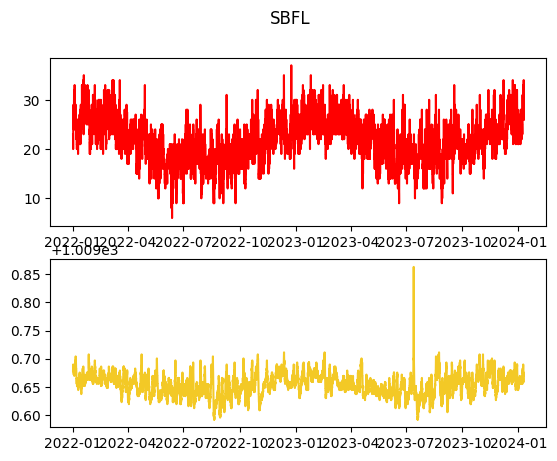

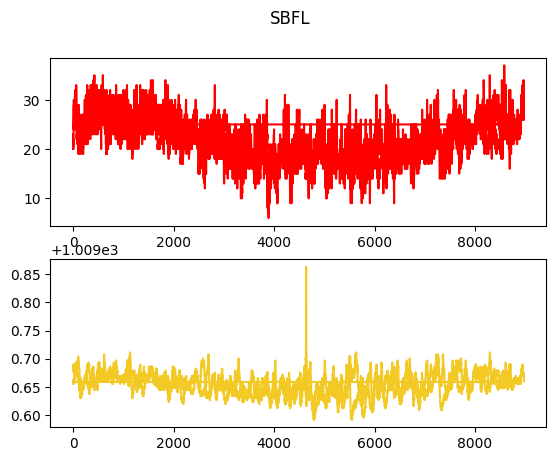

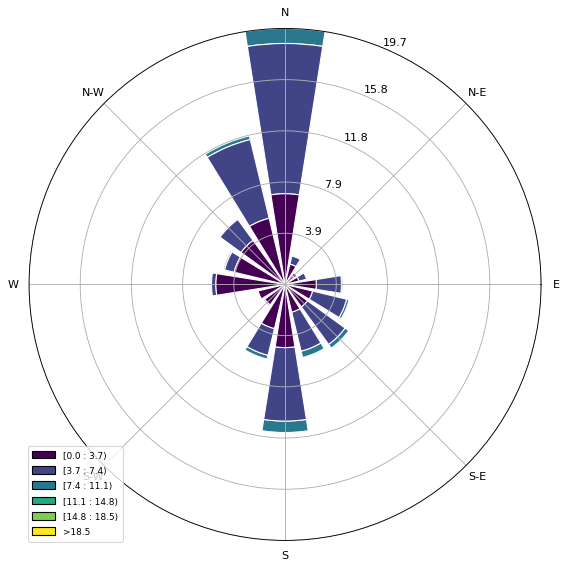

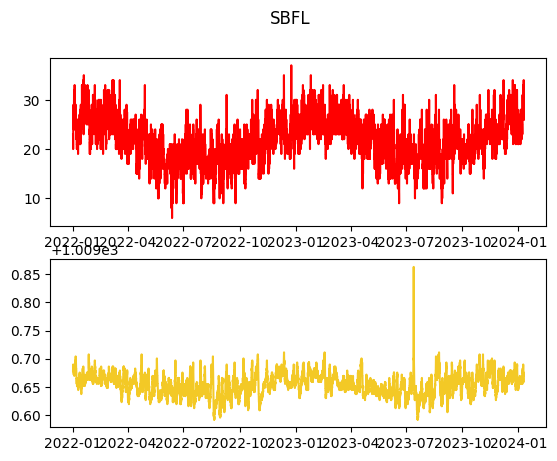

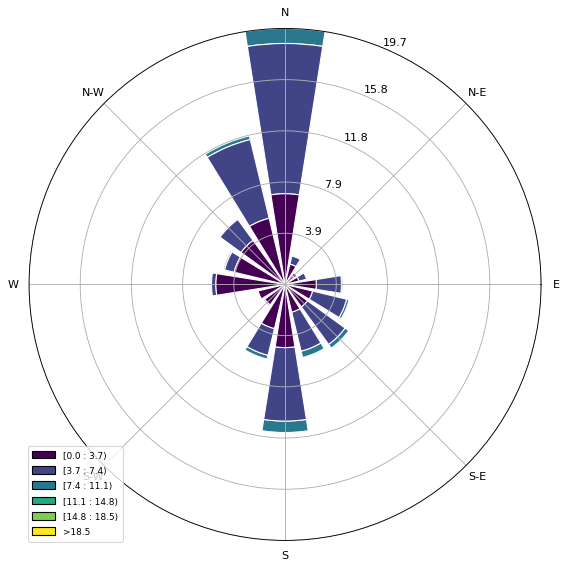

In [139]:
#Criando dataframe sem repetições
dataAll=dataAll.drop_duplicates(subset='datetime',keep='first')
print(dataAll.shape)
statisticsAndFigures (dataAll,st,years,cwd)

#Estabelecendo o índice do dataframe com datetime
dataAll=dataAll.set_index('datetime')
statisticsAndFigures (dataAll,st,years,cwd)
